# ДЗ

###### Задача 1 Связанные списки

Напишите функцию (пусть она будет называться reverse_linked_list), которая разворачивает связный список. На вход она принимает головную ноду, а на выход отдаёт хвостовую ноду исходного списка, но только теперь если попробовать пройтись по ней, она будет новой головной. С функцией из примера выше,



In [1]:
class Node(object):
    def __init__(self, value=None, next_node=None):
        self.value = value
        self.next = next_node

    def __str__(self):
        return f"[Node with value {self.value}]"


def print_linked_list(head):
    cur = head
    while cur is not None:
        print(cur)
        cur = cur.next

In [2]:
def reverse_linked_list(head):
    cur = head
    ex = None
    while cur is not None:
        link = cur.next
        cur.next = ex 
        ex = cur
        cur = link
    return ex

In [3]:
h, a, b, c, d = Node(1), Node(2), Node(3), Node("Внезапно"), Node(5)

h.next = a
a.next = b
b.next = c
c.next = d

print_linked_list(h)
h = reverse_linked_list(h)
print("---")
print_linked_list(h)

[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]
---
[Node with value 5]
[Node with value Внезапно]
[Node with value 3]
[Node with value 2]
[Node with value 1]


Подсказка: вам понадобится "вспомогательная нода", куда вы будете переворачивать список. Можете написать вспомотаельную функцию которая "переворачивает ноду".



###### Задача 2 Пузырьки

Сортировкой пузырьком это один из самых простейших алгоритмов сортировки, который можно придумать. В базовом виде он подразумеват вложенный цикл и реализуется как-то так



In [4]:
l = [5, 2, 9, 2, 0, 1, 3, 4]

for i in range(len(l)):
    for j in range(i, len(l)):
        if l[i] > l[j]:
            l[i], l[j] = l[j], l[i]

print(l)

[0, 1, 2, 2, 3, 4, 5, 9]


Вам предлагается написать функцию, которая будет на вход получать голову несортированного связного списка, а на выход возвращать голову отсортированного.



Подсказка: так как в задании ничего не сказано про то, как должна вести себя функция, можете считать что можно просто менять значения, которые лежат в нодах, без замены их указателей. Или можете написать вспомогательную функцию, которая будет менять две ноды местами.



In [5]:
def sort_list(head):
    cur = head
    while cur.next is not None:
        bubble = cur.next
        while bubble is not None:
            if cur.value > bubble.value:
                cur.value, bubble.value = bubble.value, cur.value
            bubble = bubble.next
        cur = cur.next
    return head

In [6]:
h, a, b, c, d, e, f, g = Node(5), Node(2), Node(9), Node(2), Node(0), Node(1), Node(3), Node(4)
nodes = [h, a, b, c, d, e, f, g]

for i in range(len(nodes[:-1])):
    nodes[i].next = nodes[i+1]

print_linked_list(h)
h = sort_list(h)
print("---")
print_linked_list(h)

[Node with value 5]
[Node with value 2]
[Node with value 9]
[Node with value 2]
[Node with value 0]
[Node with value 1]
[Node with value 3]
[Node with value 4]
---
[Node with value 0]
[Node with value 1]
[Node with value 2]
[Node with value 2]
[Node with value 3]
[Node with value 4]
[Node with value 5]
[Node with value 9]


###### Задача 3 Pandas

In [7]:
import pandas as pd
import seaborn

In [8]:
path = "data/"

In [9]:
tips = pd.read_csv(path+'tips.csv')

1) Выясните, сколько в среднем выходи полный счёт по пятницам на ланч у курящих мужчин (датасет tips)


In [10]:
tips[(tips.day == 'Fri') \
   & (tips.time == 'Lunch')  \
   & (tips.sex == 'Male')  \
   & (tips.smoker == "Yes")]. \
   total_bill.mean()

11.386666666666668

2) Загрузите iris и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов (датасет iris)


In [11]:
iris = pd.read_csv(path+'iris.csv')

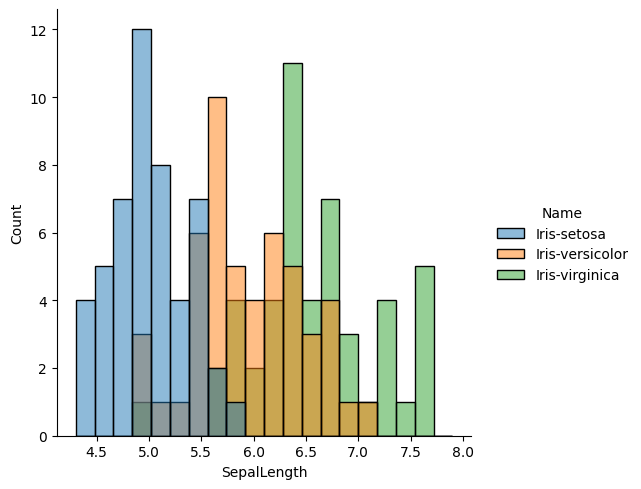

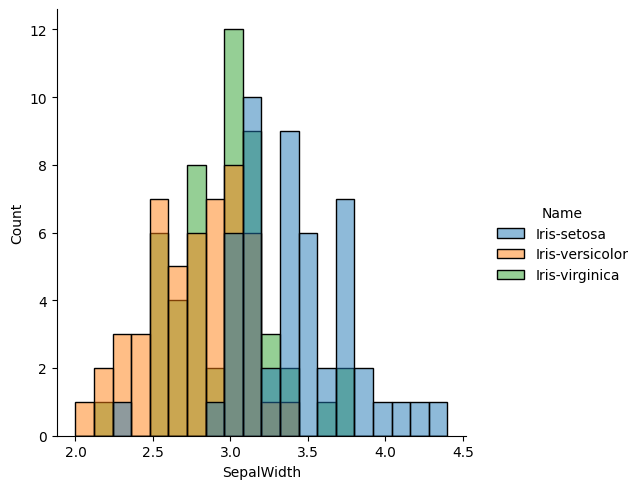

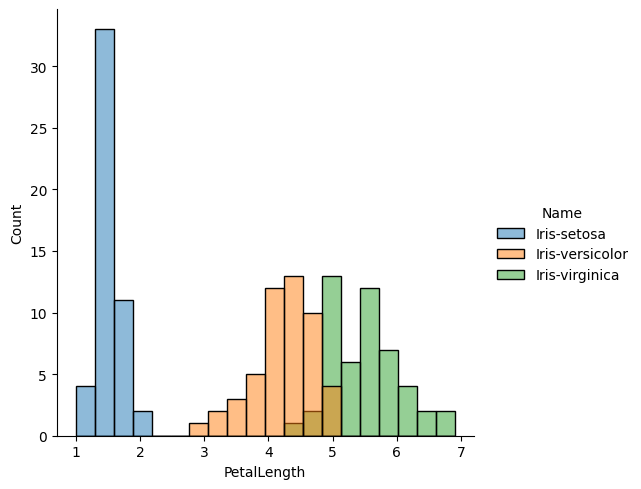

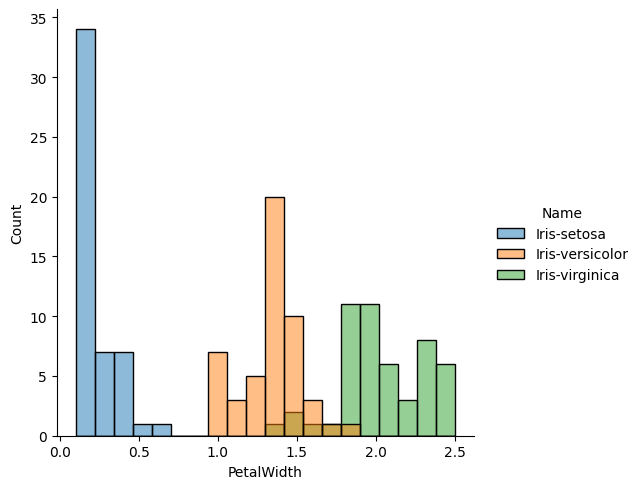

In [12]:
for col in iris.columns.values[0:4]:
    seaborn.displot(data = iris, x = col, binwidth = (iris[col].max()-iris[col].min())/20, hue = "Name")

3) Создайте новый столбец с плотностью населения. Переименуйте названия первого и третьего столбца на русский язык

In [13]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
 })

In [14]:
df['density'] = df['population']/df['square']

In [15]:
df = df.rename(columns = {'country':'страна', 'square':'площадь'})

In [16]:
df

,страна,population,площадь,density
0,Kazakhstan,17.04,2724902,0.000006
1,Russia,143.50,17125191,0.000008
2,Belarus,9.50,207600,0.000046
3,Ukraine,45.50,603628,0.000075
